# Determination of Expected Displacement
### Johanna Rahm, Sebastian Malkusch
#### Research group Heilemann
#### Institute for Physical and Theoretical Chemistry, Goethe University Frankfurt a.M.

## Load file

Insert the full file name & direcory path of the tracked seg file with .txt ending or browse for it. (Example path: F:\Marburg\single_colour_tracking\resting\160404_CS5_Cell1\cell_1_MMStack_Pos0.ome.tif.tracked.seg.txt)


In [1]:
from pySPT.widgets import widgetDirectoryStructure
from pySPT.widgets import widgetColumnSort
from pySPT.widgets import widgetExpDisp
from pySPT.preAnalysis import expDisplacement
widget_exp_disp = widgetExpDisp.WidgetExpDisp()
exp_displacement = expDisplacement.ExpDisplacement()
widget_dir_structure = widgetDirectoryStructure.WidgetDirStructure()
display(widget_exp_disp.file_text_box, widget_exp_disp.file_button)
widget_exp_disp.file_button.on_click(widget_exp_disp.open_file)
widget_exp_disp.file_text_box.observe(widget_exp_disp.change_file_box)

Text(value='path', description='Complete path', placeholder='Type something', style=DescriptionStyle(descripti…

Button(description='browse', style=ButtonStyle(), tooltip='browse for file')

## Run analysis

The expected displacement is 79.339 nm.


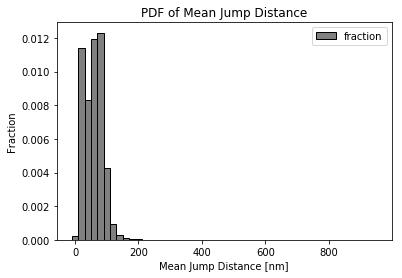

In [2]:
display(widget_exp_disp.run_button)
def run_analysis(event):
    widget_exp_disp.create_clear_output()
    if widget_exp_disp.got_file_name:
        widget_column_sort = widgetColumnSort.WidgetColumnSort(widget_exp_disp.file_text_box.value, "swift", ['"track_id"', '"mjd"', '"mjd_n"'])
        widget_column_sort.check_header()
        if widget_column_sort.correct_header:
            widget_column_sort.run_column_sort()
            exp_displacement.file_name = widget_exp_disp.file_text_box.value
            exp_displacement.column_order = widget_column_sort.column_order
            exp_displacement.run_exp_displacement()
        else:
            print("A file with false columns was loaded.")
    else:
        print("No file was loaded.")
widget_exp_disp.run_button.on_click(run_analysis)

## Save analysis

The results will be saved in a .txt file with the expected displacement & columns: mjd [nm], fraction.

In [3]:
display(widget_exp_disp.save_button)
def save_analysis(event):
    widget_exp_disp.clear_output
    widget_dir_structure.name_handling(widget_exp_disp.file_name)
    widget_dir_structure.create_raw_base_name()
    widget_dir_structure.sub_folder = "\\preAnalysis"
    widget_dir_structure.create_folder()
    exp_displacement.save_exp_displacement(widget_dir_structure.sub_folder_dir, widget_dir_structure.raw_base_name)
widget_exp_disp.save_button.on_click(save_analysis)

Button(description='save', style=ButtonStyle(), tooltip='save the results')